Instructions:

Exercise 2: Computer Vision Using Convolutional Neural Networks
Submit By: 19 October, 2024

Item 1 [10 pts]: Manually Implementing Filters On An Image
Load any image of your choice (your submission must include the image file), preferably close to a
square image in dimension, and resize it to 128 x 128 dimensions using tensorflow. Write a function
apply_image_filter() that takes in two arguments:
• img, an image, saved as an array with values scaled to [0,1]
• filter, a pxp square matrix, representing the filter to be applied to the image
The output of this function should be another image, with the filter applied. Note that given an image of
size � × �, and a filter of size � × �, application of the filter will result to a “cropped” image of size
(� − � + 1) × (� − � + 1). In practice this is solved by performing an operation known as “padding”,
but this is not required for this exercise. The cropped image output is enough. Use of the formal
convolution formula is also not required, and simply following the “sliding window” approach should
provide the expected output.
After writing apply_image_filter(), apply the following four filters:
filter_A = tf.constant([[-1, 0, 1],
[-2, 0, 2],

[-1, 0, 1]], dtype=tf.float32)

filter_B = tf.constant([[-1, -2, -1],
[ 0, 0, 0],

[ 1, 2, 1]], dtype=tf.float32)

filter_C = tf.constant([[1/16, 1/8, 1/16],
[1/8, 1/4, 1/8],

[1/16, 1/8, 1/16]], dtype=tf.float32)

filter_D = tf.constant([[ 0, -1, 0],
[-1, 5, -1],
[ 0, -1, 0]], dtype=tf.float32)
Create a 2x2 subplot showing the resulting images after applying the four filters. Compare and contrast
their outputs, and try to identify (with support of the outputted images) what each filter accomplishes on
the image.
NOTES:
• The operation should be performed using simply numpy operations and loops, without the help of
special functions that automatically apply filters (i.e., np.conv2d)
• Remember to ensure that the pixel values of the outputted image remains within the range [0,1]
after applying the filter.
• Applying a filter over a multi-channel image means simply performing the convolution
independently over each channel.
• There is a bonus of +3 points if the above is implemented where images are loaded into instances
of a class, such that apply_image_filter()is an instance method.

Item 2 [5 pts]: Comparing Dense Neural Networks with Convolutional Nets

Compare the performance of dense neural networks with convolutional neural networks on the Fashion-
MNIST dataset (tf.keras.datasets.fashion_mnist). You may feel free to adjust the

architecture and optimization strategies (regularization, early stopping, activation functions, etc.) to obtain
the best possible performance for each class of model, but in general we need only one dense (regular)
neural network and one convolutional neural network.
• Provide their architecture details as printed by the .summary() method. Is there any benefit in
terms of reducing parameter size in your choice of CNN vs a regular dense network?
• Plot their per-epoch history (accuracy rates) side-by-side as a 1 x 2 subplot, where the left plot is
history of the simple neural network, and the right hand plot is the history of the CNN.
• Compare their overall training set performance in terms of both the loss function and accuracy
score
• Compare their overall test set performance in terms of both the loss function and accuracy score

NOTES:
• For this particular application, do not make use of pretrained models.
• The classes in the Fashion MNIST dataset are as follows:
o 0, T-shirt/top
o 1, Trouser
o 2, Pullover
o 3, Dress
o 4, Coat
o 5, Sandal
o 6, Shirt
o 7, Sneaker
o 8, Bag
o 9, Ankle boot

Item 3 [5 pts]: Plotting Feature Maps from the Convolutional Neural Network
Given the CNN model you fitted in Item 2, you may feel free to make use and/or adjust the code
presented in class to print out the feature maps obtained by the first layer of your CNN. For the first
images of any three of the 10 classes available in the Fashion-MNIST dataset (either in the training set of
test set), create a 4x4 subplot of the first 16 feature maps and try and differentiate what features are being
detected by the image. Can we pinpoint features that contribute to the model detecting, say, a T-shirt, or a
Sandal?

Maximum Score: 20 pts

#### First Item

In [108]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from typing import List # for type hinting

In [109]:
# Given Filters:
filter_A = tf.constant([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=tf.float32)

filter_B = tf.constant([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=tf.float32)

filter_C = tf.constant([[1/16, 1/8, 1/16],
                        [1/8,  1/4, 1/8],
                        [1/16, 1/8, 1/16]], dtype=tf.float32)

filter_D = tf.constant([[ 0, -1,  0],
                        [-1,  5, -1],
                        [ 0, -1,  0]], dtype=tf.float32)

filters = [filter_A, filter_B, filter_C, filter_D]
filter_names = ["Filter A", "Filter B", "Filter C", "Filter D"]

In [110]:
class ImageFilter:
    def __init__(self, raw_image:str):
        raw_image = tf.io.read_file(raw_image)
        raw_image = tf.image.decode_image(raw_image, channels=3)
        self.image = tf.image.resize(raw_image, [128, 128]) / 255.0

    # For Testing Purposes
    def show_raw_image(self):
        """
        For showing the raw image
        """
        plt.figure(figsize=(5, 5))
        plt.imshow(self.image)
        plt.axis('off')
        plt.title("Raw Image")
        plt.show()
    
    def load_image(self, raw_image:str):
        """
        raw_image: path to image or image file name (string)

        returns a numpy array of the image
        """
        loaded_image = tf.io.read_file(raw_image)
        loaded_image = tf.image.decode_image(loaded_image, channels=3)
        loaded_image = tf.image.resize(loaded_image, [128, 128]) / 255.0
        return loaded_image.numpy()
    
    def apply_image_filter(self, raw_image:str, filter:np.ndarray):
        """
        raw_image: path to image or image file name (string)
        filter: An array of values formatted for image (numpy array)

        returns the raw_image with the applied filter
        """
        L, W, color = raw_image.shape
        p = filter.shape[0]
        output = np.zeros((L - p + 1, W - p + 1, color))
        
        for x in range(color):
            for i in range(L - p + 1):
                for j in range(W - p + 1):
                    coords = raw_image[i:i + p, j:j + p, x]
                    output[i, j, x] = np.sum(coords * filter)
        
        output = np.clip(output, 0, 1)
        return output
    
    def plot_image(self, filters:List, filter_names:List):
        """
        filters: A list of filter of arrays of values formatted for image (numpy array)
        filter_names: A list of string that will be used for matplotlib title

        returns the image class with the applied filter in a 2x2 plot
        """
        unused, axes = plt.subplots(2, 2, figsize=(10, 10))
    
        for i, j, x in zip(axes.flat, filters, filter_names):
            filtered_image = self.apply_image_filter(self.image, j)
            i.imshow(filtered_image)
            i.axis('off')
            i.set_title(x)
    
        plt.show()


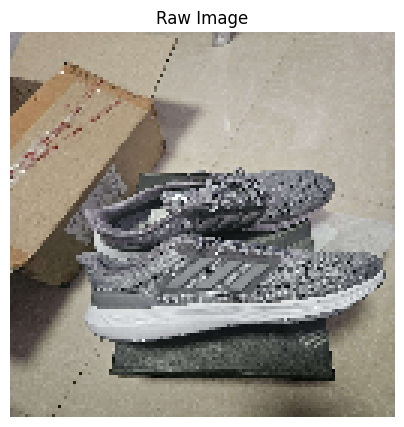

In [111]:
test_image = ImageFilter('shoes.jpg')
test_image.show_raw_image()

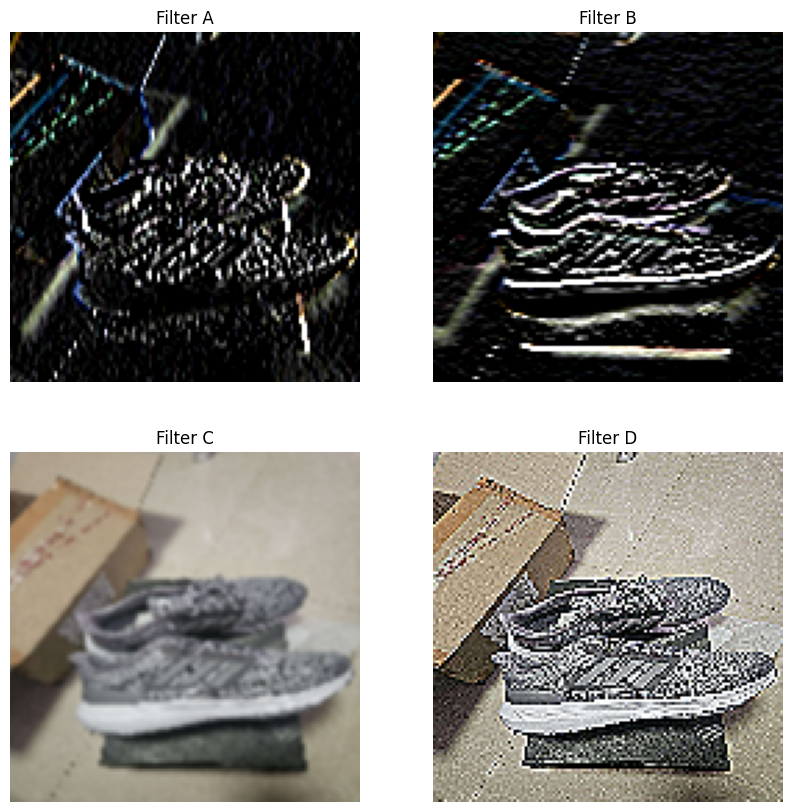

In [112]:
test_image.plot_image(filters, filter_names)

It seems like Filter A emphasizes vertical lines

Filter B emphasizes horizontal lines

Filter C made the picture more blurry even though resizing the image already made it blurry

Filter D seems like it tried to sharpen the blurry resized image

#### Second Item

Imports

In [113]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time # for runtime recording

In [114]:
# Getting the Images from Mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# DNN with loss for categorical model with 64 neurons start
def dnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# CNN with loss for categorical model with 64 filters max
def cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 1 since mnist data are gray scaled
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 1 since mnist data are gray scaled
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [115]:
dnn_example = dnn_model()
start_time = time.time()
dnn_history = dnn_example.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
end_time = time.time()
runtime = end_time - start_time
minutes = runtime // 60
seconds = runtime % 60

print(f"DNN model training time: {int(minutes)} minutes and {seconds:.2f} seconds.")
# DNN model training time: 0 minutes and 17.19 seconds.

Epoch 1/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.5379 - accuracy: 0.8131 - val_loss: 0.4675 - val_accuracy: 0.8354
Epoch 2/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.3872 - accuracy: 0.8608 - val_loss: 0.4211 - val_accuracy: 0.8471
Epoch 3/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.3524 - accuracy: 0.8722 - val_loss: 0.3869 - val_accuracy: 0.8609
Epoch 4/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.3303 - accuracy: 0.8799 - val_loss: 0.3811 - val_accuracy: 0.8640
Epoch 5/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.3138 - accuracy: 0.8851 - val_loss: 0.3891 - val_accuracy: 0.8639
Epoch 6/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.3001 - accuracy: 0.8895 - val_loss: 0.3642 - val_accuracy: 0.8707
Epoch 7/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2908 - accuracy: 0.8927 - val_loss: 0.3500 -

In [116]:
cnn_example = cnn_model()
start_time = time.time()
cnn_history = cnn_example.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
end_time = time.time()
runtime = end_time - start_time
minutes = runtime // 60
seconds = runtime % 60

print(f"CNN model training time: {int(minutes)} minutes and {seconds:.2f} seconds.")
# CNN model training time: 2 minutes and 14.16 seconds.

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5123 - accuracy: 0.8140 - val_loss: 0.3970 - val_accuracy: 0.8560
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3310 - accuracy: 0.8796 - val_loss: 0.3442 - val_accuracy: 0.8730
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2854 - accuracy: 0.8956 - val_loss: 0.2923 - val_accuracy: 0.8939
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2533 - accuracy: 0.9061 - val_loss: 0.2808 - val_accuracy: 0.8987
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2271 - accuracy: 0.9166 - val_loss: 0.2743 - val_accuracy: 0.8998
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2069 - accuracy: 0.9229 - val_loss: 0.2961 - val_accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1896 - accuracy: 0.9298 - val_loss: 0.2594 - val_ac

In [117]:
# Provide their architecture details as printed by the .summary() method. Is there any benefit in terms of reducing parameter size in your choice of CNN vs a regular dense network?

# Based on the training results, the CNN model used twice as much parameters with significantly more time so reducing the parameter size in a CNN model would have a much 
# more significant impact than reducing the parameter sizes in a DNN model

print("DNN Model Summary:")
dnn_example.summary()

print("\nCNN Model Summary:")
cnn_example.summary()

DNN Model Summary:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________

CNN Model Summary:
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape            

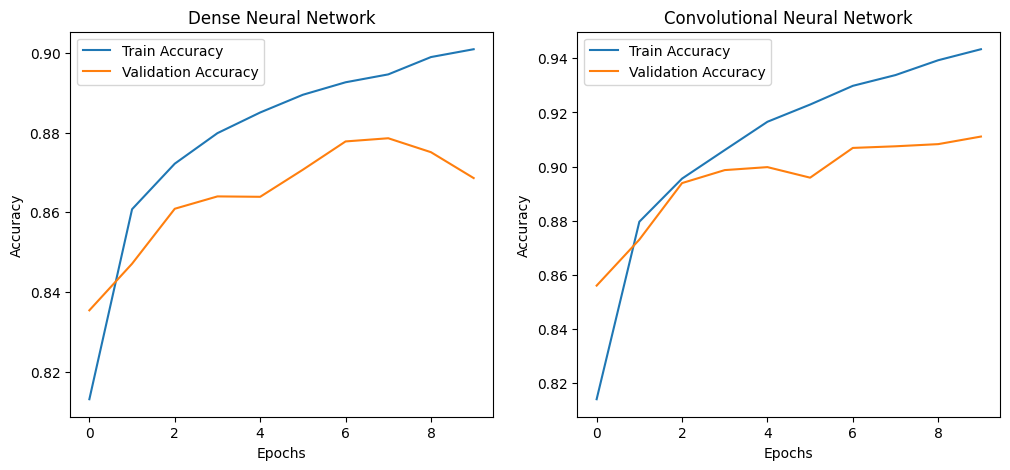

In [118]:
# Plot their per-epoch history (accuracy rates) side-by-side as a 1 x 2 subplot, where the left plot is history of the simple neural network, and the right hand plot is the history of the CNN.

def plot_histories(dnn_history, cnn_history):
    unused, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Left
    axes[0].plot(dnn_history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(dnn_history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Dense Neural Network')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Right
    axes[1].plot(cnn_history.history['accuracy'], label='Train Accuracy')
    axes[1].plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title('Convolutional Neural Network')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.show()

plot_histories(dnn_history, cnn_history)

In [119]:
# Compare their overall test set performance in terms of both the loss function and accuracy score

# It seems that per epoch, the DNN model has more loss and after training has less accuracy than the CNN. The CNN Model has less loss per step and has higher accuracy but
# has a longer training time

dnn_loss, dnn_acc = dnn_example.evaluate(test_images, test_labels)
cnn_loss, cnn_acc = cnn_example.evaluate(test_images, test_labels)

print(f"Dense Model Test Accuracy: {dnn_acc:.4f}, Test Loss: {dnn_loss:.4f}")
print(f"CNN Model Test Accuracy: {cnn_acc:.4f}, Test Loss: {cnn_loss:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9111
Dense Model Test Accuracy: 0.8686, Test Loss: 0.3627
CNN Model Test Accuracy: 0.9111, Test Loss: 0.2743


#### Item 3

In [120]:
class FeatureMaps:
    def __init__(self, cnn_example, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.feature_map_model = models.Model(inputs=cnn_example.input, outputs=cnn_example.layers[0].output)
        self.class_names = [
            'T-shirt/top', 
            'Trouser', 
            'Pullover', 
            'Dress', 
            'Coat', 
            'Sandal', 
            'Shirt', 
            'Sneaker', 
            'Bag', 
            'Ankle boot'
        ]

    def show_raw_images(self, class_index):
        indices = np.where(self.train_labels == class_index)[0][:16]

        unused, axes = plt.subplots(4, 4, figsize=(10, 10))

        for i, j in enumerate(axes.flatten()):
            j.imshow(self.train_images[indices[i]], cmap='viridis')
            j.axis('off')

        plt.suptitle(f'Raw Images for Class: {self.class_names[class_index]}', fontsize=20)
        plt.show()

    def show_feature_maps(self, class_index):
        indices = np.where(self.train_labels == class_index)[0][:16]
        feature_maps = []

        for x in indices:
            image = np.expand_dims(self.train_images[x], axis=0)  # Expand dims
            feature_maps.append(self.feature_map_model.predict(image))

        unused, axes = plt.subplots(4, 4, figsize=(10, 10))

        for i, j in enumerate(axes.flatten()):
            j.imshow(feature_maps[i][0, :, :, 0], cmap='viridis')  # Show the first feature map
            j.axis('off')
            
        plt.suptitle(f'Feature Maps for Class: {self.class_names[class_index]}', fontsize=20)
        plt.show()

# Hi sir, ginawa ko na lang po class ito instead of a function para lang po mapakita ang raw images and feature maps sa isang call block using diff methods

In [121]:
mnist_maps = FeatureMaps(cnn_example, train_images, train_labels)

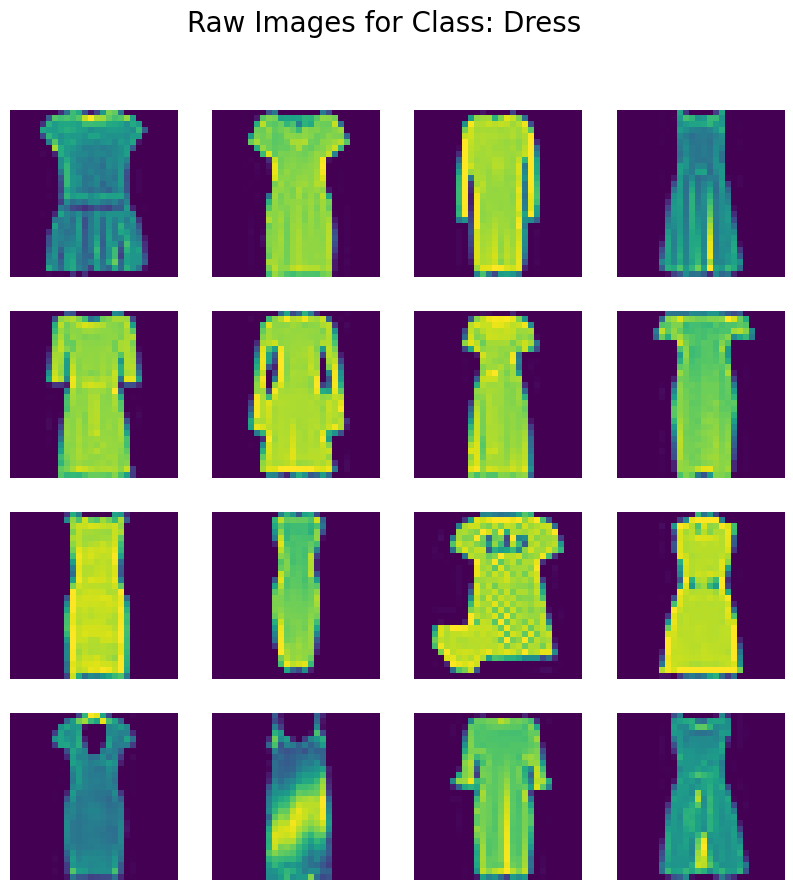

1/1 [==============================] - 0s 11ms/step


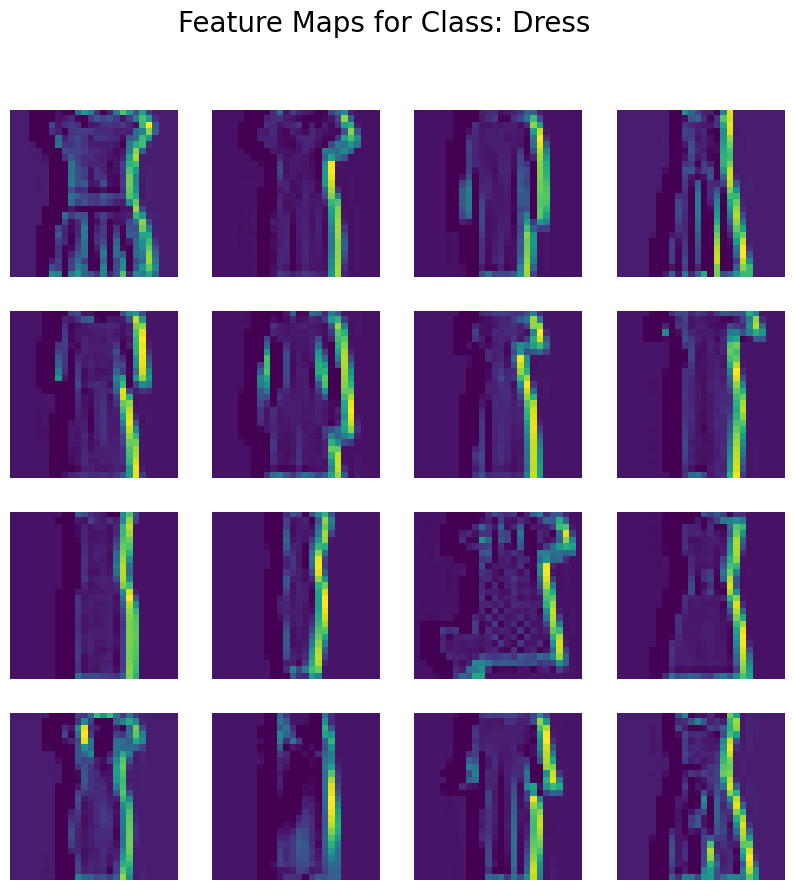

In [122]:
# For Dress
mnist_maps.show_raw_images(3)
mnist_maps.show_feature_maps(3)

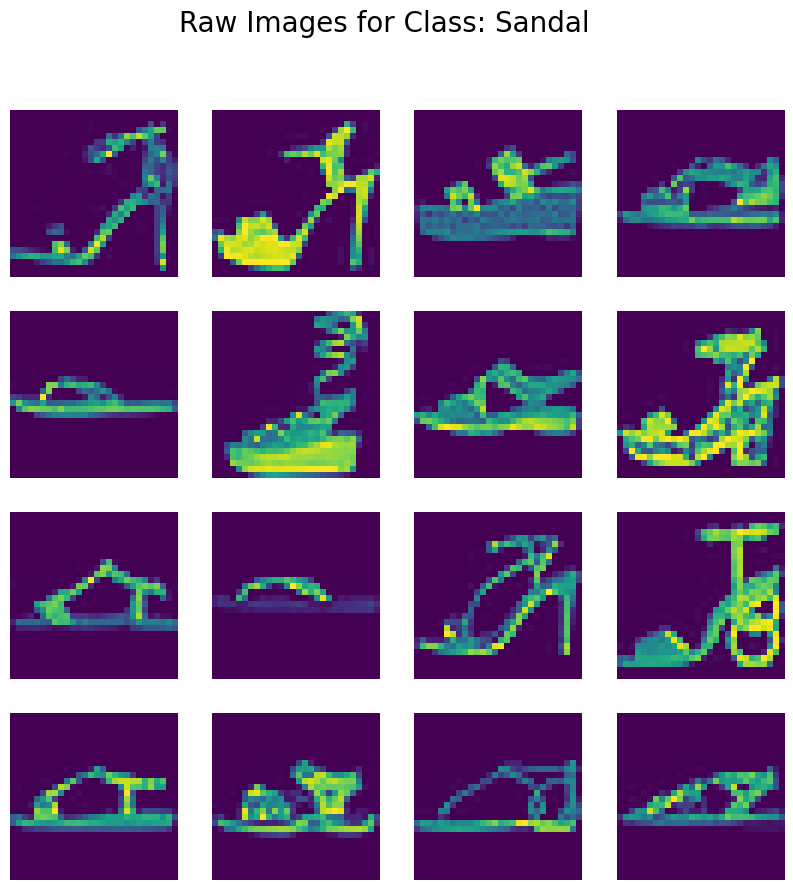

1/1 [==============================] - 0s 14ms/step


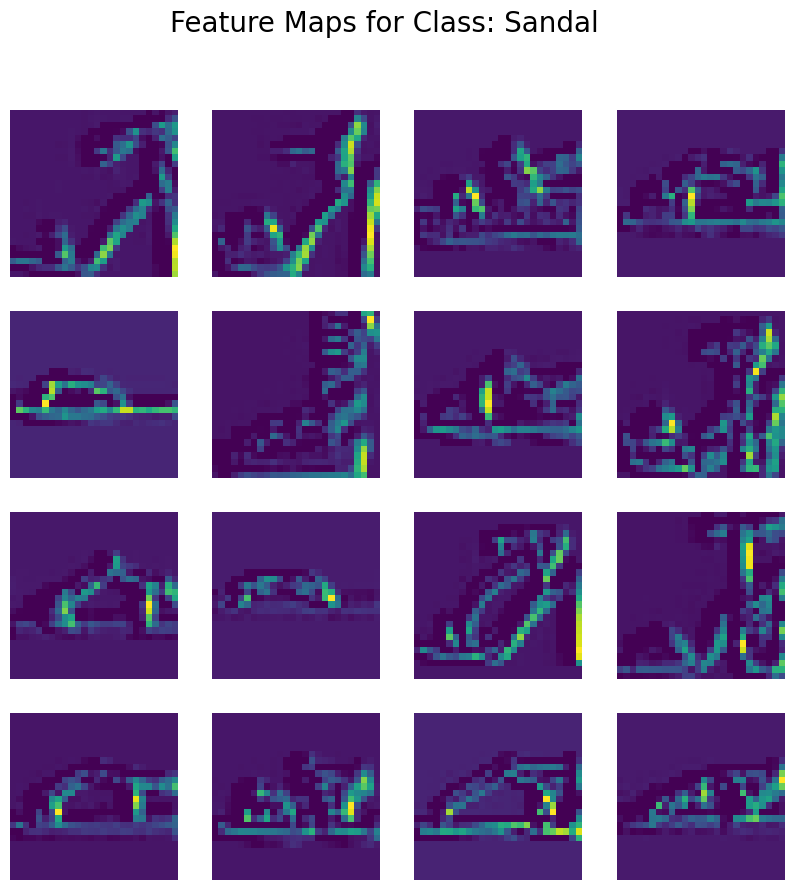

In [123]:
# For Sandal
mnist_maps.show_raw_images(5)
mnist_maps.show_feature_maps(5)

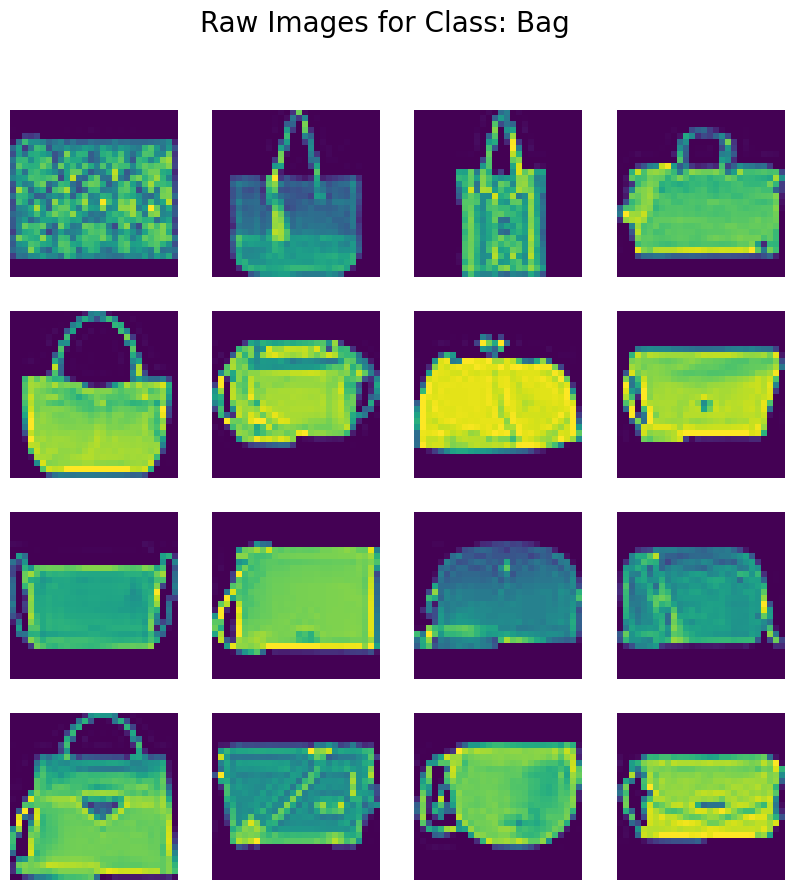

1/1 [==============================] - 0s 11ms/step


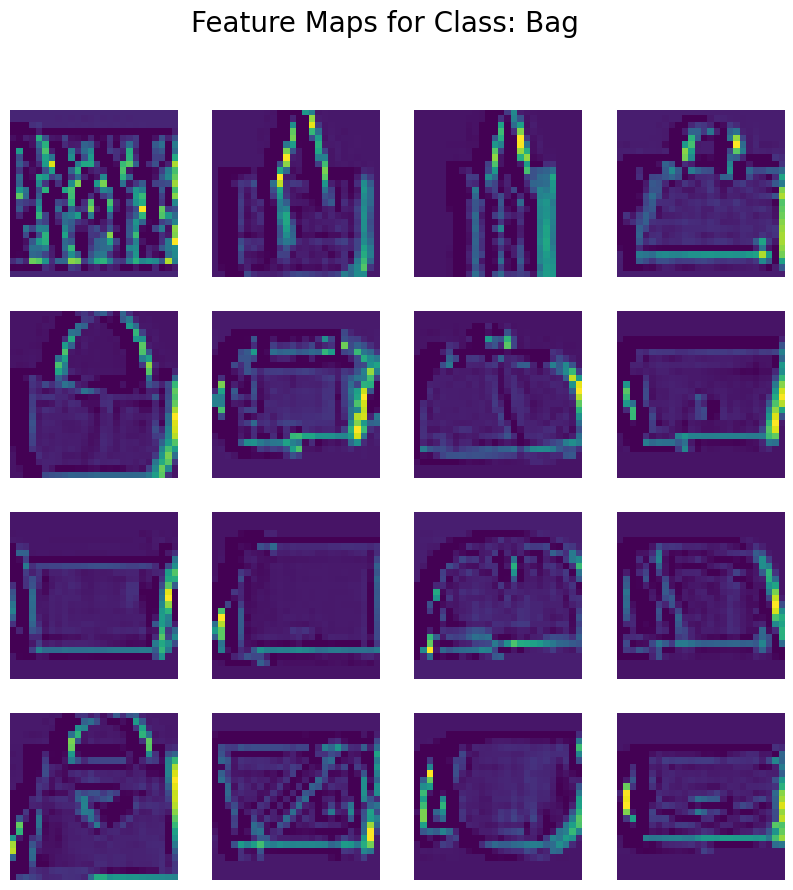

In [124]:
# For Bag
mnist_maps.show_raw_images(8)
mnist_maps.show_feature_maps(8)

In [ ]:
# Can we pinpoint features that contribute to the model detecting, say, a T-shirt, or a Sandal?

# It seems that The first layer captured the shapes of the figure of the fashion item. However, there are highlighted features for each of the fashion item. For dresses, it emphasized
# highlighting the elongated sides, peculiarly the right side, of the dress. For the sandals, the highlights emphasized the overall shape of sandals though it is understandable given
# that sandals do not have a uniform format or shape. For bags, the highlights emphasized on the straps of some bags and for some the horizontal base of the bag. These features may not 
# be the most sought-after feature we look for as humans, but for a machine, it makes sense these features are emphasized due to these features are the ones that make the fashion item unique
# when compared to others.